In [1]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
# reading dataset 

# data collection
df = pd.read_csv('C:/Users/dz234/OneDrive/Desktop/Learning Process/Applied Data Science/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [20]:
# explore rating 
df.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

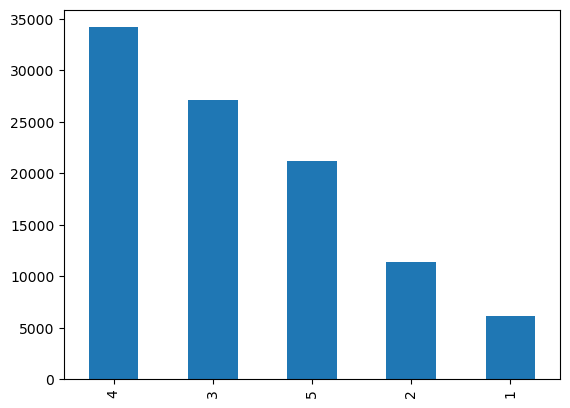

In [21]:
# plot bar chart
df.rating.value_counts().plot(kind = 'bar')
plt.show()

In [22]:
# display general info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [23]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [24]:
# data pre-processing 
df = df[['userId', 'movieId','rating','timestamp']]
df = df.iloc[:,:-1]

In [25]:
df.head()

,userId,movieId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [26]:
from surprise import Reader, Dataset

In [27]:
reader = Reader()
data = Dataset.load_from_df(df[['userId','movieId','rating']],reader)

In [28]:
# train/test split 
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size = 0.25)

In [29]:
# fitting training set SVD algo
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [31]:
# prediction using test set 
pred = algo.test(testset)

In [33]:
# calculate accuracy
from surprise import accuracy
accuracy.rmse(pred)

RMSE: 0.9462


0.9461524965164794